# 2HG Reporting Tool
## 1) Configuration

- scan_id
  - format: PatientN_YYYYMMDD (e.g. "CarlsonB_20210208")
- scan_type
  - For _3T 97ms_, use **svs_se_97**
  - For _7T 110ms_, use **slaser_svs_110**
- output_dir
- verbose
  - 0: no output
  - 1: output best pipeline
  - 2: output all pipelines

In [1]:
%load_ext autoreload
%autoreload 2

config = {
    'scan_id': 'OrtegaL_20210520',
    'scan_type': 'svs_se_97',
    'output_dir': '/external/SFA/SPECTRO/users/sam/Report 2HG/output/',
    'verbose': 1
}

## 2) Table

Generate a table with 2HG (CRLB), 2HG/Cr+PCr, and (2HG+Gln)/Glu values.

### Arguments

- config (required)
- pipelines (optional): _dict_; configuration of pipelines to display in table
  - key: _str_; ROI name
  - value: _str_; pipeline name
  - each ROI defaults to best pipeline if key not in dict

### Returns
- Generates table of **2HG (CRLB)**, **2HG/Cr+PCr**, and **(2HG+Gln)/Glu**.
- Creates a .csv in `output_dir`.

In [ ]:
from utils.table import generate_table

pipelines = {
}

generate_table(config, pipelines)

## 3) Boxplots

Generate 2HG (CRLB), 2HG/Cr+PCr, and (2HG+Gln)/Glu values and boxplots for all voxels and pipelines in given scan.

### Arguments
- config (required)

### Returns
- Generates boxplots of **2HG (CRLB)**, **2HG/Cr+PCr**, and **(2HG+Gln)/Glu**.
- Creates a directory in `output_dir` and writes .png files inside that directory.

In [ ]:
from utils.boxplots import generate_plots

generate_plots(config)

## 4) Progression Plot (Optional)

Generate progression plot. Automatic progression will run if the patient has the standard lesion and healthy contralateral voxel. If the patient has additional voxels, manual processing must be done by passing in a `scan_history` dictionary.

### Arguments
- config (required)
- dates_to_exclude (optional): _list_; dates to exclude from **automatic** processing; is ignore if using manual processing
  - e.g. `dates_to_exclude = ['20200401', '20200701']`
- scan_history (optional): _dict_; configuration for **manual** processing. `Numbers` correspond to **SpecN**, or **index - 2**, where index is the row index of the scan in the 2HG CCS_Database **input** file. `Strings` correspond to the path to the CCS_Autoproc output.
  - key: _str_; ROI name
  - value: _list_; SpecN and file path
  - e.g. 
  ```
    scan_history = {
        '20x20x20 Lesion': [
            474,
           '.../CCS_AutoProc/output/StinsonL_20210503/meas_MID00499_FID39492_svs_se_97_18x40x20'
        ],
        '20x20x15 Lesion': [
            476,
           '.../CCS_AutoProc/output/StinsonL_20210503/meas_MID00499_FID39492_svs_se_97_18x40x20'
        ],
        '20x20x20 Contralateral': [
            475,
           '.../CCS_AutoProc/output/StinsonL_20210503/meas_MID00499_FID39492_svs_se_97_18x40x20'
        ]
    }
  ```

### Returns
- Generates progression plot of **2HG (CRLB)**, **2HG/Cr+PCr**, and **(2HG+Gln)/Glu**.
- Writes progression plot inside `output_dir`.

Scan: OrtegaL_20210520


,ROI,Best Pipeline,File
0,Lesion,Fc,/external/SFA/SPECTRO_PROC/CCS_AutoProc/output/OrtegaL_20210520/meas_MID01421_FID48134_svs_se_97/meas_MID01421_FID48134_svs_se_97-Fc.CSV
1,CL,FcEcc,/external/SFA/SPECTRO_PROC/CCS_AutoProc/output/OrtegaL_20210520/meas_MID01437_FID48150_svs_se_97_CL/meas_MID01437_FID48150_svs_se_97_CL-FcEcc.CSV


Manual Mode


,specn,id,date,roi,metabolite,value
3,453.0,OrtegaL_20191120,20191120,Occipital Lesion,2HG,2.090000
4,453.0,OrtegaL_20191120,20191120,Occipital Lesion,2HG/Cr+PCr,0.173000
5,453.0,OrtegaL_20191120,20191120,Occipital Lesion,(2HG+Gln)/Glu,0.777528
6,454.0,OrtegaL_20200702,20200702,Occipital Lesion,2HG,4.354000
7,454.0,OrtegaL_20200702,20200702,Occipital Lesion,2HG/Cr+PCr,0.279000
8,454.0,OrtegaL_20200702,20200702,Occipital Lesion,(2HG+Gln)/Glu,3.433638
9,455.0,OrtegaL_20200702,20200702,Healthy Contralateral,2HG,4.343000
10,455.0,OrtegaL_20200702,20200702,Healthy Contralateral,2HG/Cr+PCr,0.269000
11,455.0,OrtegaL_20200702,20200702,Healthy Contralateral,(2HG+Gln)/Glu,0.737674
0,NaN,NaN,20210520,Frontoparietal Lesion,2HG,0.485000


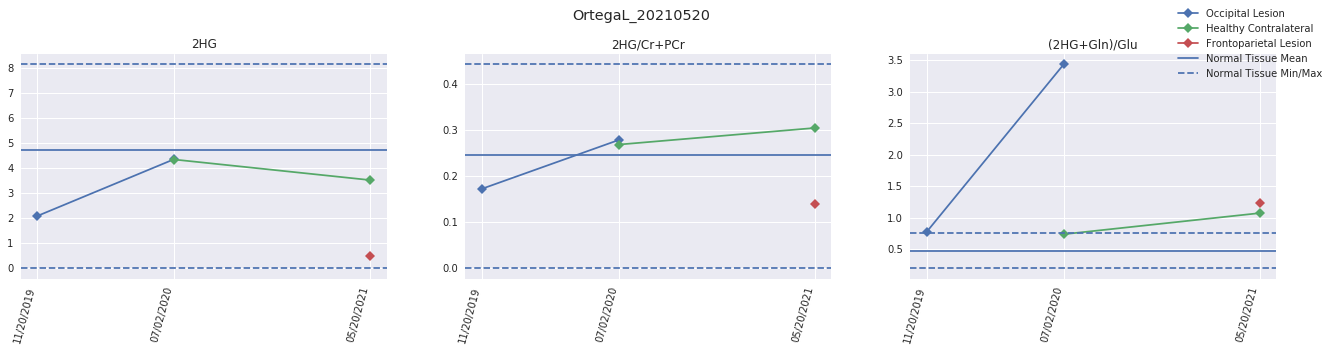

Processing complete. Progression plot saved to /external/SFA/SPECTRO/users/sam/Report 2HG/output/OrtegaL_20210520


In [40]:
from utils.progression import generate_progression

dates_to_exclude = []
scan_history = {
    'Frontoparietal Lesion': [
        '/external/SFA/SPECTRO_PROC/CCS_AutoProc/output/OrtegaL_20210520/meas_MID01421_FID48134_svs_se_97'
    ],
    'Occipital Lesion': [
        453,
        454,
        
    ],
    'Healthy Contralateral': [
        455,
        '/external/SFA/SPECTRO_PROC/CCS_AutoProc/output/OrtegaL_20210520/meas_MID01437_FID48150_svs_se_97_CL/AllPipelines/meas_MID01437_FID48150_svs_se_97_CL-Ecc.CSV'
    ]
}

generate_progression(config, dates_to_exclude, scan_history)
